In [1]:
import os, sys
sys.path.insert(0, os.path.abspath("../src"))

In [1]:
from qudit_sim import backend
from qudit_sim.backend import *
from qudit_sim.circuit import QuantumCircuit
from qudit_sim.utils import *
from qudit_sim.tableau import Tableau
from qudit_sim.predefined_gates import *

backend.show_backend_info()

Array backend: numpy
Precision: complex128
 → Running with NumPy (CPU)


## Create a circuit

In [3]:
n, d = 4, 3

qc = QuantumCircuit(n, d, name="example_circuit")

qc.S(0)
qc.CX(0, 1)
qc.H(0)
qc.S(1)
qc.Hdag(2)
qc.Xdag(2)
qc.CZ(1, 3)
qc.SWAP(0, 2)
qc.CXdag(0, 2)
qc.CZ(2, 0)
qc.Hdag(3)
qc.Y(3)
qc.CXdag(3, 0)
qc.CZ(0, 1)
qc.measure_all()

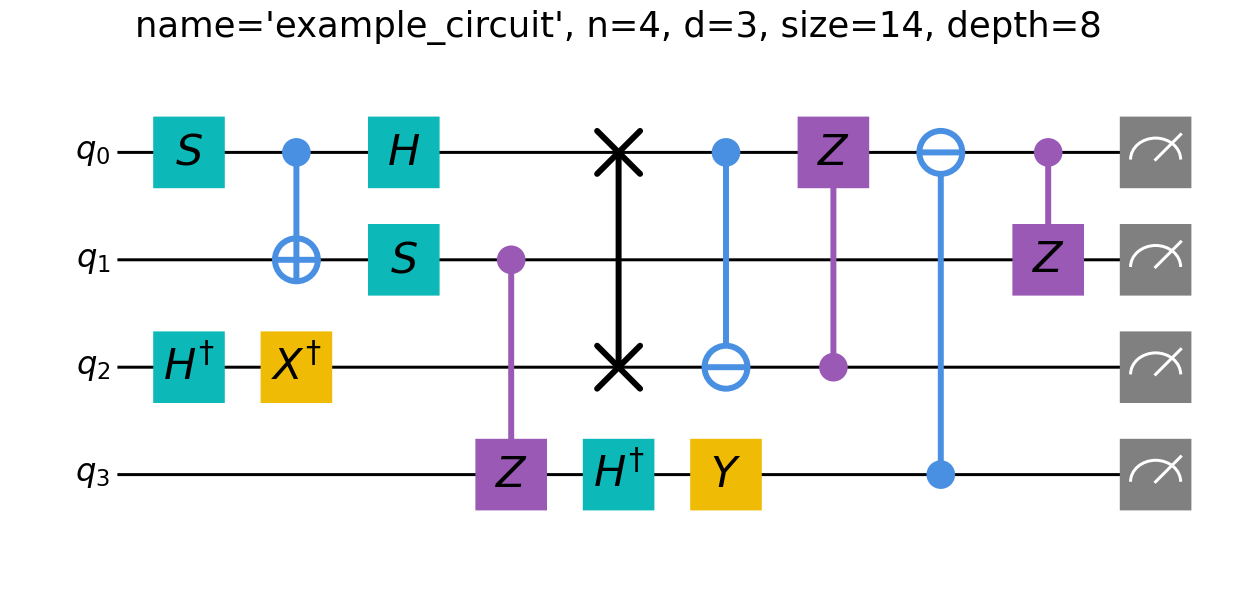

In [4]:
qc.draw(show_info=True)

## Statevector simulation

In [5]:
psi, _ = qc.execute(print_state=False)
np.round(psi, 4)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j])

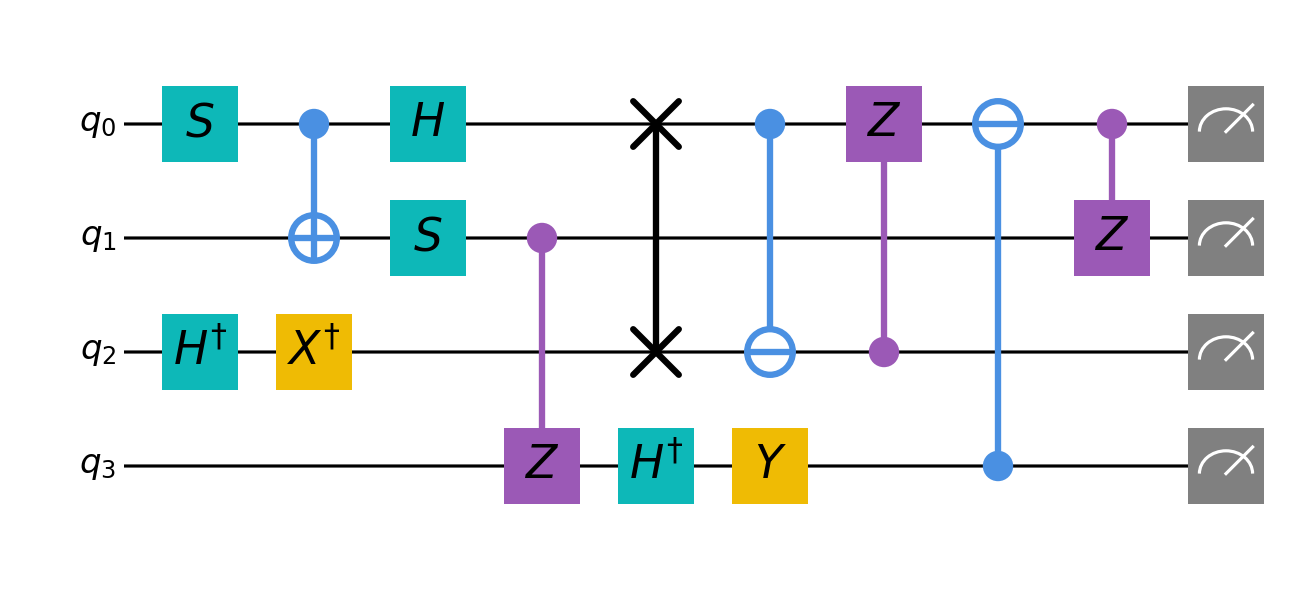

In [6]:
qc2 = qc.copy()

qc2.draw()

In [7]:
psi2, res = qc2.execute()
res

{0: 1, 1: 0, 2: 1, 3: 2}

## Density matrix simulation

In [8]:
final_rho = qc.execute_density_matrix()
prob_vector_dm = density_matrix_to_probvector(final_rho)
prob_vector_dm

array([0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
# compare to statevec probvector
np.allclose(prob_vector_dm, abs(psi) ** 2, atol=1e-8, rtol=0)

False

## Tableau simulation

In [10]:
tab = Tableau(n, d, full=True)

In [11]:
print(tab)

#  | x0 x1 x2 x3 | z0 z1 z2 z3 | τ
──────────────────────────────────
d0 |  1  0  0  0 |  0  0  0  0 | 0
d1 |  0  1  0  0 |  0  0  0  0 | 0
d2 |  0  0  1  0 |  0  0  0  0 | 0
d3 |  0  0  0  1 |  0  0  0  0 | 0
----------------------------------
s0 |  0  0  0  0 |  1  0  0  0 | 0
s1 |  0  0  0  0 |  0  1  0  0 | 0
s2 |  0  0  0  0 |  0  0  1  0 | 0
s3 |  0  0  0  0 |  0  0  0  1 | 0


In [12]:
tab.print_stabilizers()

#  | phase | 0 | 1 | 2 | 3
──────────────────────────
d0 | 1     | X | I | I | I
d1 | 1     | I | X | I | I
d2 | 1     | I | I | X | I
d3 | 1     | I | I | I | X
--------------------------
s0 | 1     | Z | I | I | I
s1 | 1     | I | Z | I | I
s2 | 1     | I | I | Z | I
s3 | 1     | I | I | I | Z


In [13]:
tab.apply_circuit(qc, print_tableau=True)

Initial tableau:
#  | x0 x1 x2 x3 | z0 z1 z2 z3 | τ
──────────────────────────────────
d0 |  1  0  0  0 |  0  0  0  0 | 0
d1 |  0  1  0  0 |  0  0  0  0 | 0
d2 |  0  0  1  0 |  0  0  0  0 | 0
d3 |  0  0  0  1 |  0  0  0  0 | 0
----------------------------------
s0 |  0  0  0  0 |  1  0  0  0 | 0
s1 |  0  0  0  0 |  0  1  0  0 | 0
s2 |  0  0  0  0 |  0  0  1  0 | 0
s3 |  0  0  0  0 |  0  0  0  1 | 0

--- Applying S on qudit 0 ---
#  | x0 x1 x2 x3 | z0 z1 z2 z3 | τ
──────────────────────────────────
d0 |  1  0  0  0 |  1  0  0  0 | 0
d1 |  0  1  0  0 |  0  0  0  0 | 0
d2 |  0  0  1  0 |  0  0  0  0 | 0
d3 |  0  0  0  1 |  0  0  0  0 | 0
----------------------------------
s0 |  0  0  0  0 |  1  0  0  0 | 0
s1 |  0  0  0  0 |  0  1  0  0 | 0
s2 |  0  0  0  0 |  0  0  1  0 | 0
s3 |  0  0  0  0 |  0  0  0  1 | 0

--- Applying CNOT on qudits 0, 1 ---
#  | x0 x1 x2 x3 | z0 z1 z2 z3 | τ
──────────────────────────────────
d0 |  1  1  0  0 |  1  0  0  0 | 0
d1 |  0  1  0  0 |  0  0  0  0 | 0
d2 |

Tableau(n=4, d=3, full=True, rows=8)

In [14]:
tab.print_stabilizers(show_omegas=True)

#  | phase | 0   | 1  | 2   | 3 
────────────────────────────────
d0 | ω²    | X²Z | X  | X²Z | X 
d1 | 1     | X²Z | X  | I   | X 
d2 | ω²    | Z²  | I  | I   | Z²
d3 | ω     | I   | Z  | I   | Z²
--------------------------------
s0 | 1     | Z²  | I  | X²  | Z²
s1 | 1     | Z   | Z  | X   | Z 
s2 | ω²    | XZ² | Z  | X²Z | Z²
s3 | ω     | X²  | Z² | I   | X 


In [15]:
tab[1]

array([2, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int8)

In [16]:
prob_vector_tab = tab.to_probvector_exact()
prob_vector_tab

array([0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.03703704, 0.03703704, 0.03703704, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
# compare to statevec probvector
np.allclose(prob_vector_tab, abs(psi) ** 2, atol=1e-8, rtol=0)

False

In [18]:
tab.measure_all(seed=42, in_place=False)[1]

array([0, 0, 2, 1])

## Run tableau on a random circuit and sample from it

In [19]:
n, d = 100, 7
circuit_size = 10_000
circuit_depth = 10_000
qc = random_circuit(n, d, max_size=circuit_size, max_depth=circuit_depth, seed=None)
print(qc.size, qc.depth)

10000 173


In [20]:
total_shots = 100_000

tab2 = Tableau(n, d, full=True)

In [21]:
%%time
tab2.apply_circuit(qc)

CPU times: total: 2.55 s
Wall time: 12.2 s


Tableau(n=100, d=7, full=True, rows=200)

In [22]:
%%time
tab2.sample_measurements(total_shots)

CPU times: total: 1.97 s
Wall time: 4.79 s


array([[1, 6, 3, ..., 5, 5, 0],
       [3, 5, 5, ..., 1, 2, 1],
       [3, 3, 6, ..., 2, 4, 3],
       ...,
       [3, 5, 6, ..., 2, 6, 0],
       [5, 5, 4, ..., 0, 4, 0],
       [3, 0, 2, ..., 6, 1, 4]], shape=(100000, 100))